### Importación de datos



In [2]:
import pandas as pd

In [3]:


url1 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda1 = pd.read_csv(url1)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda1.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



En este primer análisis, calculamos el ingreso total de cada tienda. Sumando los valores de la columna 'Precio' de cada conjunto de datos de la tienda para estimar los ingresos, almacenandolos en una lista aparte para luego poder mostrar los datos con un gráfico de barras

In [4]:
ingresos_totales = []
# iteramos sobre cada una de las tiendas
for tienda in (tienda1, tienda2, tienda3, tienda4):
    # usamos la función suma() sobre la lista de precios en tienda["Precio"] para obtener la sumatoria de todos los valores, y a ese resultado lo agregamos a la lista
    ingresos_totales.append(sum(tienda["Precio"]))
    # al estar ordenadas las tiendas en (tienda1, tienda2, tienda3, tienda4), dentro de la lista ingresos_totales, los valores estarán ordenados respectivamente a cada tienda

print(ingresos_totales) # sólo para observar los datos obtenidos

print(f'La tienda qué más vendió fue la número {ingresos_totales.index(max(ingresos_totales))+1} ')
# la explicación de esta estructura    ingresos_totales.index(max(ingresos_totales))+1    es la siguiente
# con max(ingresos_totales) obtenemos el máximo valor dentro de la lista
# usamos ingresos_totales.index(max(ingresos_totales)) para obtener cuál es el index del elemento con máximo valor
# y finalmente adicionamos 1 con ingresos_totales.index(max(ingresos_totales))+1 para que nos dé el respectivo número de tienda, ya que los index de una lista inician en 0 pero nuestras tiendas comienzan numeradas con 1
# entonces obtenemos finalmente el número de la tienda que tuvo el máximo de ventas

[1150880400.0, 1116343500.0, 1098019600.0, 1038375700.0]
La tienda qué más vendió fue la número 1 


In [5]:
!pip install matplotlib==3.8.1

In [6]:
import matplotlib.pyplot as plt

In [7]:
# creamos esta lista con el nombre de las tiendas para poder mostrarlos en el eje x del gráfico de barras
tiendas = ['Tienda1', 'Tienda2', 'Tienda3', 'Tienda4']

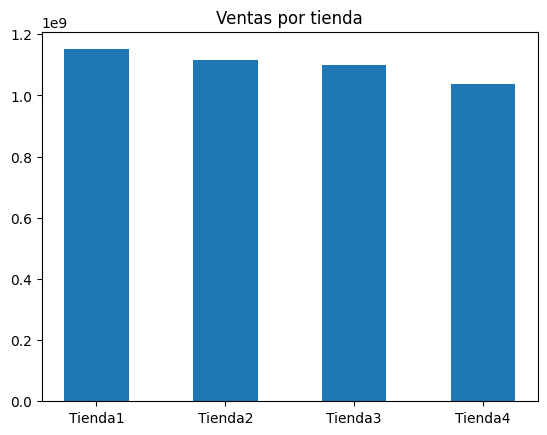

In [10]:
# mostramos la venta por tienda en un gráfico de barras
plt.title("Ventas por tienda")
plt.bar(x = tiendas, height = ingresos_totales, width=0.5)
plt.show()


In [13]:
# Creamos una lista de diccionarios donde almacenaremos los datos que vamos estudiando de las tiendas.
# Cada elemento de la lista, será un diccionario correspondiente a una tienda, que será iniciado con el nombre de la tienda
datos = [{'nombre': 'Tienda1'}, {'nombre': 'Tienda2'}, {'nombre': 'Tienda3'}, {'nombre': 'Tienda4'}]

for i in range(4):
    # agregamos los datos de la de lista de ingresos_totales obtenida previamente
    datos[i]['ingresos totales']=ingresos_totales[i]

# visualizamos cómo queda
datos


[{'nombre': 'Tienda1', 'ingresos totales': 1150880400.0},
 {'nombre': 'Tienda2', 'ingresos totales': 1116343500.0},
 {'nombre': 'Tienda3', 'ingresos totales': 1098019600.0},
 {'nombre': 'Tienda4', 'ingresos totales': 1038375700.0}]

# 2. Ventas por categoría

En este paso calcularemos la cantidad de productos vendidos por categoría en cada tienda. 
La idea es agrupar los datos por categoría y contar el número de ventas de cada tipo, mostrando las categorías más populares de cada tienda.

In [23]:
# dentro de cada elemento de la lista datos, se encuentra una tienda. A cada tienda añadiremos un elemento a su diccionario llamado "categorias", 
# el cuál será un diccionario que luego almacenará como llaves las distintas categorías y cuyos valores serán la cantidad de productos vendidos de esa categorías.
for i in range(4):
    # añadimos dentro de cada tienda el elemento llamado "categorias" que tendrá un diccionario vacío donde luego añadiremos las categorías con cantidad de productos vendidos por .
    datos[i]['categorias']={}

In [24]:
# inicializamos d como contador, para poder iterar dentro de la lista 'datos' con index(d), y así ir recorriendo cada tienda
d = 0

# vamos a iterar a través de las bases de datos de las distintas tiendas
for tienda in (tienda1,tienda2,tienda3,tienda4):

  # dentro de la tienda, ingresaremos a "Categoría del Producto"
  # tienda["Categoría del Producto"] nos devuelve un objeto de tipo pandas.core.series.Series
  # tienda['Categoría del Producto'].items() nos devuelve un objeto tipo zip
  # con list(tienda['Categoría del Producto'].items()) nos devuelve una lista de tuplas, donde el primer elemento será del registro, y el segundo la categoría de dicha venta, cuyo index será 1
  for categoria in list(tienda['Categoría del Producto'].items()):

    # por eso dentro de los items de categoría, para acceder propiamente el nombre de la categoría del producto, debemos usar categoria[1]
    
    # si la categoría ya existe dentro de nuestro registro de categorías en datos, adicionamos 1 a su valor, para saber cuántos productos fueron vendidos de esa categoría
    if categoria[1] in datos[d]['categorias']:
      datos[d]['categorias'][categoria[1]] += 1
    # si la categoría no existe en nuestro registro, la inicializamos con valor = 1
    else:
      datos[d]['categorias'][categoria[1]] = 1

  #para ordenar alfabéticamente las categorías
  datos[d]['categorias'] = dict(sorted(datos[d]['categorias'].items()))
  
  # para continuar al siguiente elemento de nuestra lista de datos, adicionamos uno a d que usamos como index para acceder a la tienda correspondiente en la lista 'datos'
  d+=1

datos  

[{'nombre': 'Tienda1',
  'ingresos totales': 1150880400.0,
  'categorias': {'Artículos para el hogar': 171,
   'Deportes y diversión': 284,
   'Electrodomésticos': 312,
   'Electrónicos': 448,
   'Instrumentos musicales': 182,
   'Juguetes': 324,
   'Libros': 173,
   'Muebles': 465}},
 {'nombre': 'Tienda2',
  'ingresos totales': 1116343500.0,
  'categorias': {'Artículos para el hogar': 181,
   'Deportes y diversión': 275,
   'Electrodomésticos': 305,
   'Electrónicos': 422,
   'Instrumentos musicales': 224,
   'Juguetes': 313,
   'Libros': 197,
   'Muebles': 442}},
 {'nombre': 'Tienda3',
  'ingresos totales': 1098019600.0,
  'categorias': {'Artículos para el hogar': 177,
   'Deportes y diversión': 277,
   'Electrodomésticos': 278,
   'Electrónicos': 451,
   'Instrumentos musicales': 177,
   'Juguetes': 315,
   'Libros': 185,
   'Muebles': 499}},
 {'nombre': 'Tienda4',
  'ingresos totales': 1038375700.0,
  'categorias': {'Artículos para el hogar': 201,
   'Deportes y diversión': 277,
  

In [26]:
# redactamos una función para mostrar con gráfico de barras las ventas por categoría de una tienda, y pidiendo también como parámetro el color en el que se mostrará el gráfico
def mostrarDatosCategorias(ntienda, colbar = "blue"):

    '''Función para  mostrar un gráfico de barras según el número de tienda dentro de la lista "datos" 
    
    ntienda: número de la tienda a graficar
    colbar: color deseado de las barras
    
    '''
    # lista para almacenar los valores a mostrar en el gráfico de la cantidad de ventas por categoría
    valores = []

    # dentro de datos ingresamos a la tienda deseada por indexación por eso a ntienda le restamos 1, y luego entramos a 'categorias', donde iteramos entre las distintas categorías de una tiendo
    for categoria in datos[ntienda-1]['categorias']:
        # añadimos a la lista 'valores' el valor de la categoría 
        valores.append(datos[ntienda-1]['categorias'][categoria])

    # iniciamos el gráfico con su título, tamaño de fuente, espesor de la misma y color
    plt.title(f"Ventas por categoría en Tienda{ntienda}", fontsize=16, fontweight="bold", color='black')

    # asignamos argumentos al eje x e y, como también el color de las barras
    plt.bar(x = list(datos[ntienda-1]['categorias']), height = valores, color = colbar)

    # damos inclinación a las etiquetas del eje x debido a que son muchas y se superponen
    plt.xticks(rotation=90)
    
    # mostramos el gráfico
    plt.show()

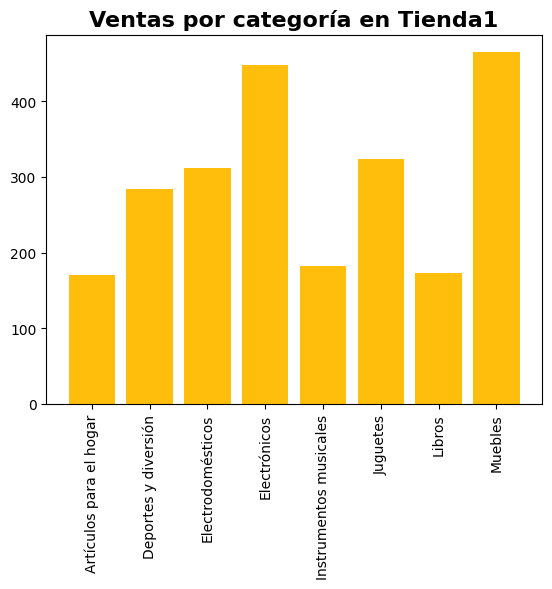

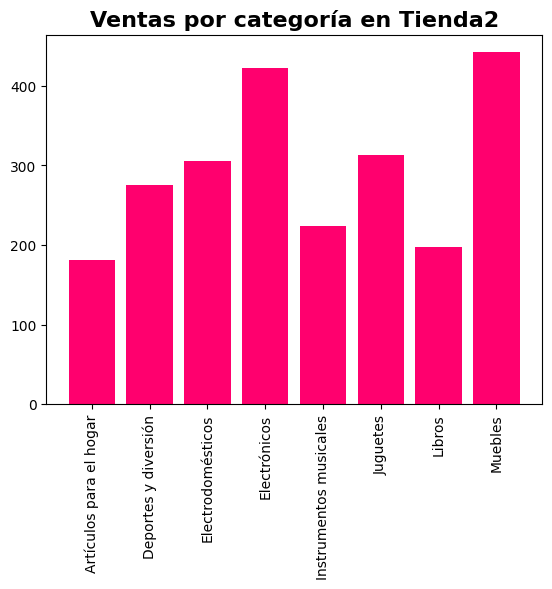

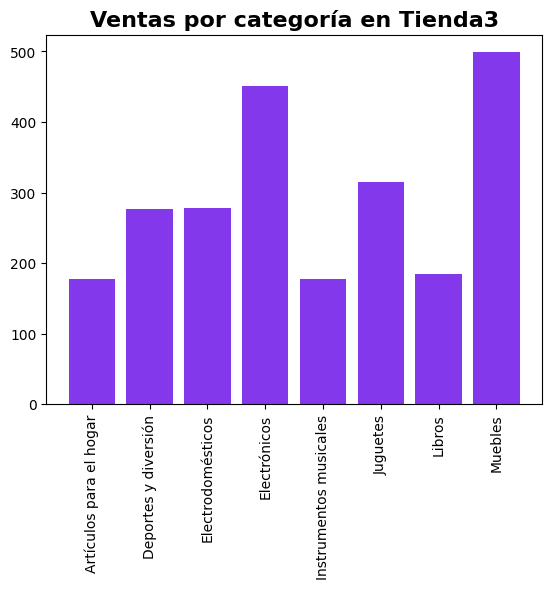

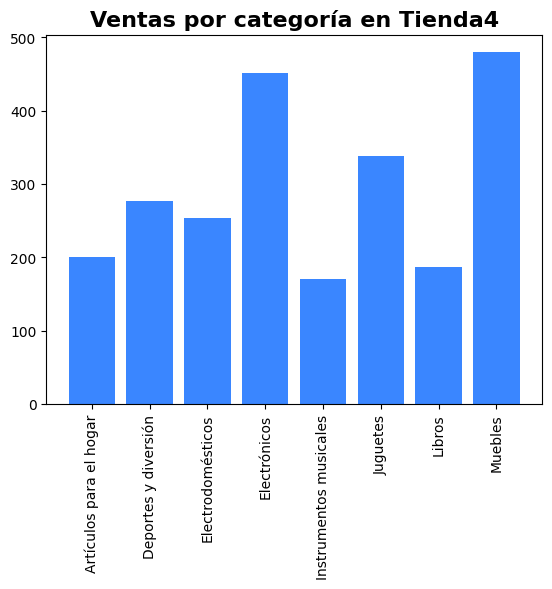

In [30]:
mostrarDatosCategorias(1, '#ffbe0b')
mostrarDatosCategorias(2, "#ff006e")
mostrarDatosCategorias(3, "#8338ec")
mostrarDatosCategorias(4, "#3a86ff")

Creando una salida por tabla para ver mejor la cantidad de productos vendidos por categoría por tienda

In [31]:
# imprimimos el encabezado de la tabla
print(f"{'Categoría':<30} | {'Tienda1'.center(10)} | {'Tienda2'.center(10)} | {'Tienda3'.center(10)} | {'Tienda4'.center(10)}")
# imprimimos los valores de la tebla iterando sobre las categorías y mostrando cantidad vendida por tienda y por categoría
for categoria in datos[0]['categorias']:
    print(f"{categoria:<30} | {str(datos[0]['categorias'][categoria]).center(10)} | {str(datos[1]['categorias'][categoria]).center(10)} | {str(datos[2]['categorias'][categoria]).center(10)} | {str(datos[3]['categorias'][categoria]).center(10)}")

Categoría                      |  Tienda1   |  Tienda2   |  Tienda3   |  Tienda4  
Artículos para el hogar        |    171     |    181     |    177     |    201    
Deportes y diversión           |    284     |    275     |    277     |    277    
Electrodomésticos              |    312     |    305     |    278     |    254    
Electrónicos                   |    448     |    422     |    451     |    451    
Instrumentos musicales         |    182     |    224     |    177     |    170    
Juguetes                       |    324     |    313     |    315     |    338    
Libros                         |    173     |    197     |    185     |    187    
Muebles                        |    465     |    442     |    499     |    480    


# 3. Calificación promedio de la tienda


En este paso, calculamos las calificaciones promedio de los clientes para cada tienda. El objetivo es conocer la satisfacción del cliente con los productos vendidos.

In [32]:
def calificacionMedia (tienda, ntienda):
    ''' Función definida para conocer la satisfacción del cliente con los productos vendidos.
    
    tienda: archivo original del que comenzamos a extraer los datos
    ntienda: número de la tienda que vamos a trabajar para anexar el valor calculado a nuestra lista de datos

    return = media : float
    '''

    # dentro de la tienda, entramos a 'Calificación' con tienda['Calificación'], lo convertimos en lista y aplicamos la función sum() para obtener la sumatoria de calificaciones
    # luego con la función len() la aplicamos a la lista de calificaciones para dividir la sumatoria entre la cantidad y obtenemos la media
    media = sum(list(tienda['Calificación']))/len(list(tienda['Calificación']))
    
    # añadimos a nuestra lista 'datos', dentro de la tienda correspondiente con ntienda, la llave 'Calificación Media' con el valor obtenido
    datos[ntienda-1]['Calificación Media'] = media

    # devolvemos el valor de la media
    return media


In [33]:
calificacionMedia(tienda1,1)
calificacionMedia(tienda2,2)
calificacionMedia(tienda3,3)
calificacionMedia(tienda4,4)

3.9957591178965224

In [34]:
datos

[{'nombre': 'Tienda1',
  'ingresos totales': 1150880400.0,
  'categorias': {'Artículos para el hogar': 171,
   'Deportes y diversión': 284,
   'Electrodomésticos': 312,
   'Electrónicos': 448,
   'Instrumentos musicales': 182,
   'Juguetes': 324,
   'Libros': 173,
   'Muebles': 465},
  'Calificación Media': 3.976685036032217},
 {'nombre': 'Tienda2',
  'ingresos totales': 1116343500.0,
  'categorias': {'Artículos para el hogar': 181,
   'Deportes y diversión': 275,
   'Electrodomésticos': 305,
   'Electrónicos': 422,
   'Instrumentos musicales': 224,
   'Juguetes': 313,
   'Libros': 197,
   'Muebles': 442},
  'Calificación Media': 4.037303942348453},
 {'nombre': 'Tienda3',
  'ingresos totales': 1098019600.0,
  'categorias': {'Artículos para el hogar': 177,
   'Deportes y diversión': 277,
   'Electrodomésticos': 278,
   'Electrónicos': 451,
   'Instrumentos musicales': 177,
   'Juguetes': 315,
   'Libros': 185,
   'Muebles': 499},
  'Calificación Media': 4.048325561678677},
 {'nombre': '

# 4. Productos más y menos vendidos

En este paso, identificamos qué productos fueron los más vendidos y los menos vendidos en cada tienda. Visualizamos los resultados para que quede claro qué productos destacaron en ventas en cada tienda.

In [36]:
# iniciamos un contador para ir iterando a su vez dentro de nuestra lista datos, en la tienda correspondiente con indexación d, para añadir los productos y cantidad vendida por tienda
d = 0

# iteraremos sobre los archivos originales de cada tienda
for tienda in (tienda1,tienda2,tienda3,tienda4):
  # añadimos a nuestra tienda en datos, la llave 'productos' inicializada como un diccionario vacío
  datos[d]['productos'] ={}

  # iteramos por tupla obtenida en la lista de items de productos, accediendo siempre al elemento de index 1, ya que el 0 corresponde a número de registro
  for producto in list(tienda['Producto'].items()):

    # si el producto ya se encuentra en nuestro registro, sumamos uno a su valor
    if producto[1] in datos[d]['productos']:
      datos[d]['productos'][producto[1]] += 1
    
    # sino inicializamos el producto en el registro con valor de 1
    else:
      datos[d]['productos'][producto[1]] = 1

  #para ordenar alfabéticamente las categorías
  datos[d]['productos'] = dict(sorted(datos[d]['productos'].items()))

  # para continuar iterando sobre nuestras tiendas en datos, sumamos uno a la variable d
  d+=1

# para visualizar
datos

[{'nombre': 'Tienda1',
  'ingresos totales': 1150880400.0,
  'categorias': {'Artículos para el hogar': 171,
   'Deportes y diversión': 284,
   'Electrodomésticos': 312,
   'Electrónicos': 448,
   'Instrumentos musicales': 182,
   'Juguetes': 324,
   'Libros': 173,
   'Muebles': 465},
  'Calificación Media': 3.976685036032217,
  'productos': {'Ajedrez de madera': 49,
   'Armario': 60,
   'Asistente virtual': 40,
   'Auriculares': 50,
   'Auriculares con micrófono': 33,
   'Balón de baloncesto': 55,
   'Balón de voleibol': 42,
   'Batería': 53,
   'Bicicleta': 54,
   'Bloques de construcción': 56,
   'Cama box': 44,
   'Cama king': 44,
   'Carrito de control remoto': 52,
   'Celular ABXY': 33,
   'Ciencia de datos con Python': 39,
   'Cubertería': 52,
   'Cubo mágico 8x8': 44,
   'Cuerda para saltar': 40,
   'Dashboards con Power BI': 42,
   'Dinosaurio Rex': 40,
   'Estufa': 45,
   'Guitarra acústica': 46,
   'Guitarra eléctrica': 47,
   'Impresora': 54,
   'Iniciando en programación': 

Mostrando cantidad de productos vendidos por tienda en formato gráfico de barras

In [131]:
def mostrarDatosProductos(ntienda, colbar):
    valores = []
    for i in datos[ntienda-1]['productos']:
        valores.append(datos[ntienda-1]['productos'][i])
    #para ordenar alfabéticamente las categorías
    datos[ntienda-1]['productos'] = dict(sorted(datos[ntienda-1]['productos'].items()))
    plt.figure(figsize=(15, 5))
    plt.bar(x = list(datos[ntienda-1]['productos']), height = valores, color = colbar)
    
    plt.xticks(rotation=90)
    plt.title(f"Tienda{ntienda}", fontsize=16, fontweight="bold", color='black')
    plt.show()

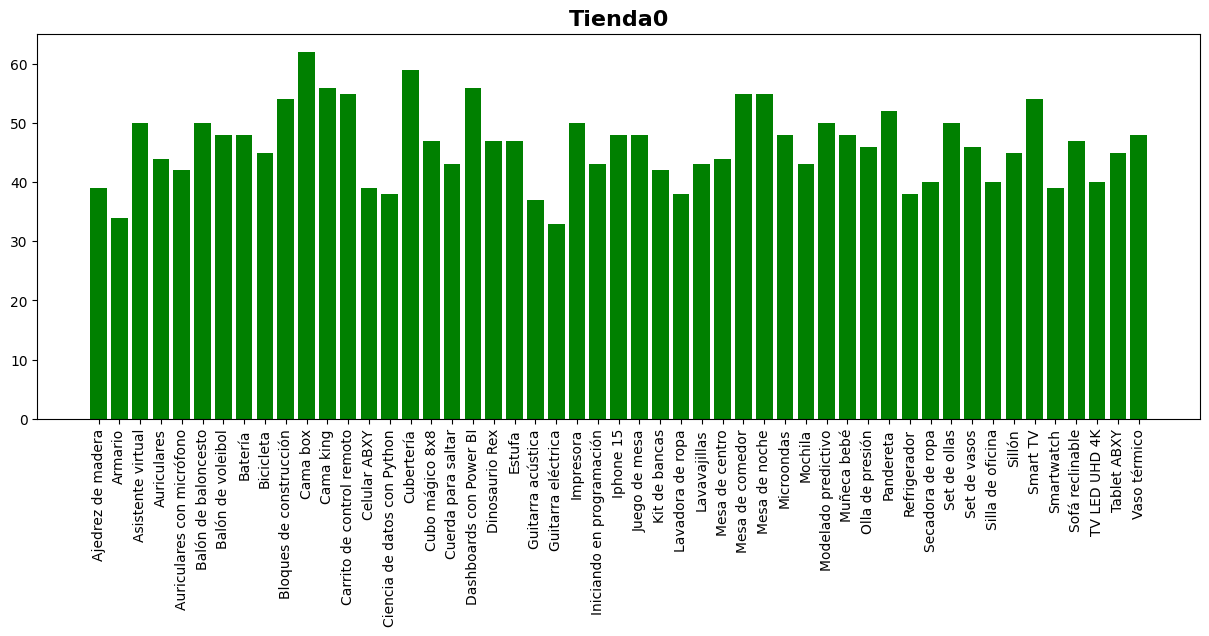

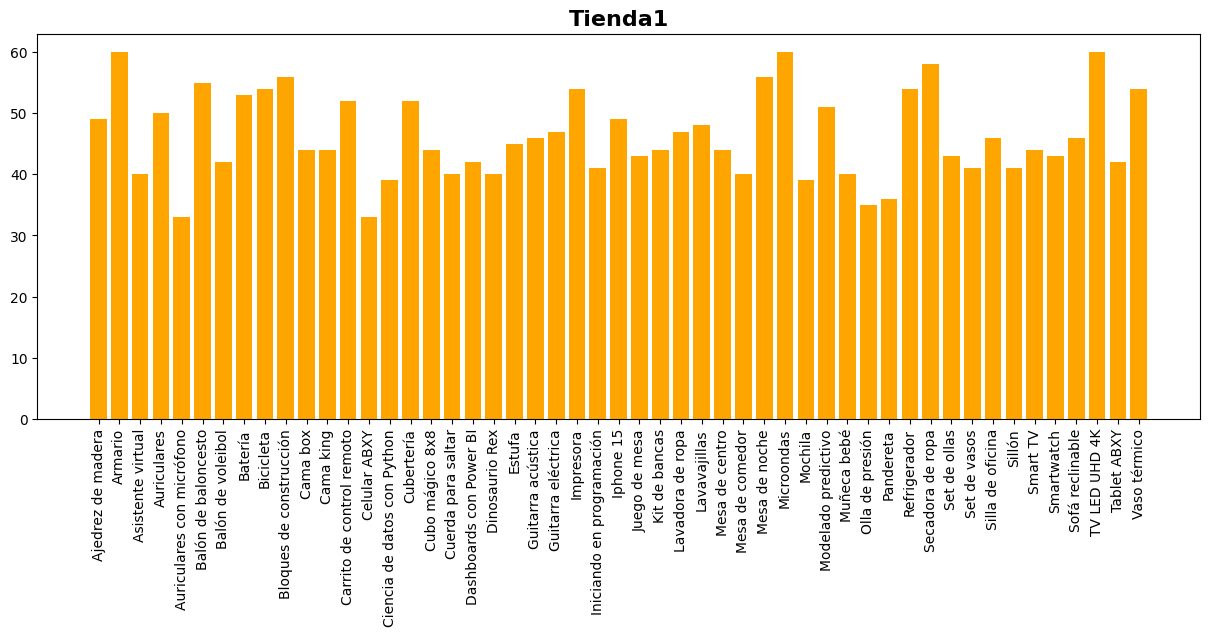

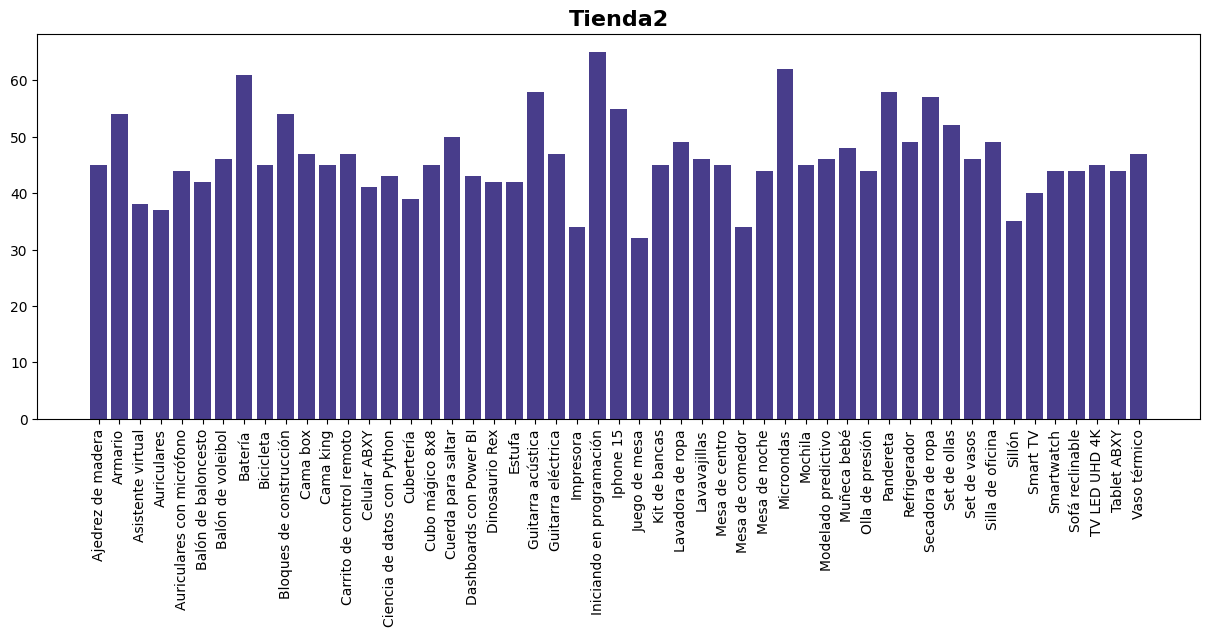

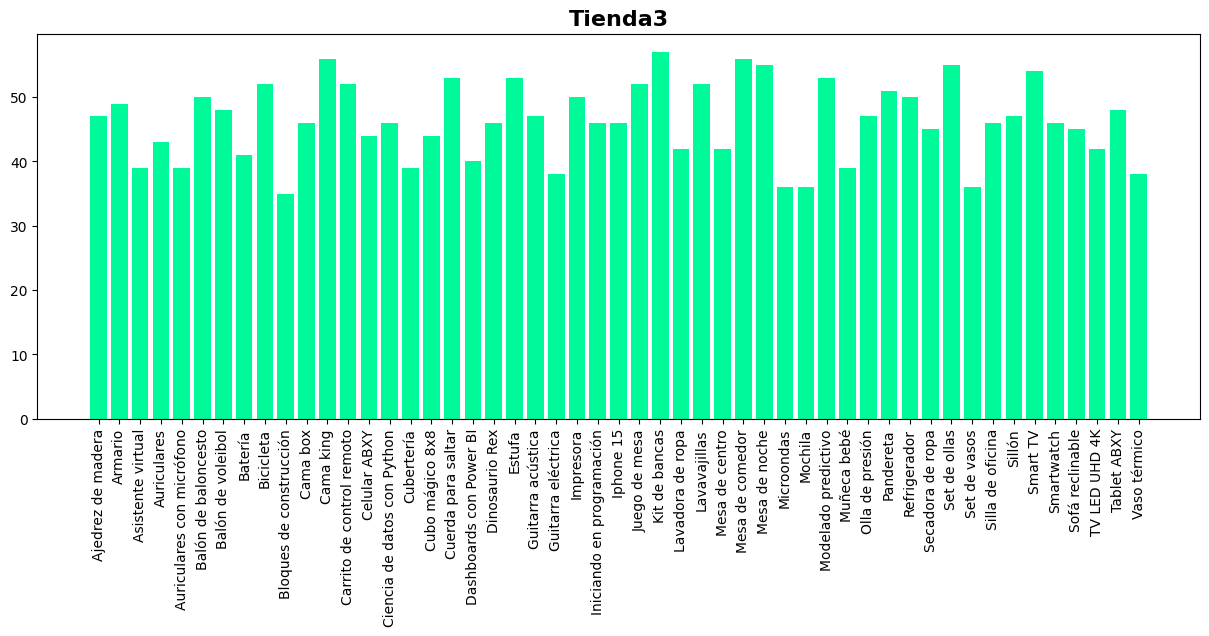

In [132]:
mostrarDatosProductos(0,"green")
mostrarDatosProductos(1,"orange")
mostrarDatosProductos(2,"darkslateblue")
mostrarDatosProductos(3,"mediumspringgreen")

Para resaltar con un color especial los productos más vendidos 

In [ ]:
def mostrarDatosProductos(ntienda):
    valores = []
    colores = []
    productoMasVendido = datos[ntienda-1]['productos'][0]
    productoMenosVendido = 0
    for i in datos[ntienda-1]['productos']:
        valores.append(datos[ntienda-1]['productos'][i])
        if datos[ntienda-1]['productos'] == i:
            datos[ntienda-1]['productos'][i] += 1
        else:
            datos[ntienda-1]['productos'] = 1
        if datos[ntienda-1]['productos'][i] > masVendido:
            masVendido = datos[ntienda-1]['productos'][i]
        elif datos[ntienda-1]['productos'][i] < menosVendido:
            productoMenosVendido = i
        
    plt.figure(figsize=(15, 5))
    plt.bar(x = list(datos[ntienda-1]['productos']), height = valores, color = colores)
    
    plt.xticks(rotation=90)
    plt.title(f"Tienda{ntienda}", fontsize=16, fontweight="bold", color='black')
    plt.show()

SyntaxError: invalid syntax (4103949920.py, line 12)

In [135]:
datos[0]['productos'][0]

KeyError: 0

In [ ]:
mostrarDatosProductos(1)

TypeError: 'int' object is not subscriptable

In [ ]:
list(tienda1["Producto"].items())

[(0, 'Asistente virtual'),
 (1, 'Mesa de comedor'),
 (2, 'Juego de mesa'),
 (3, 'Microondas'),
 (4, 'Silla de oficina'),
 (5, 'Bloques de construcción'),
 (6, 'Muñeca bebé'),
 (7, 'Lavavajillas'),
 (8, 'Lavadora de ropa'),
 (9, 'Carrito de control remoto'),
 (10, 'Refrigerador'),
 (11, 'Lavavajillas'),
 (12, 'Auriculares'),
 (13, 'Olla de presión'),
 (14, 'Bicicleta'),
 (15, 'Ciencia de datos con Python'),
 (16, 'Balón de voleibol'),
 (17, 'Ajedrez de madera'),
 (18, 'TV LED UHD 4K'),
 (19, 'Juego de mesa'),
 (20, 'Microondas'),
 (21, 'Vaso térmico'),
 (22, 'Bicicleta'),
 (23, 'Kit de bancas'),
 (24, 'Dashboards con Power BI'),
 (25, 'Cubertería'),
 (26, 'Set de ollas'),
 (27, 'Batería'),
 (28, 'Cuerda para saltar'),
 (29, 'Carrito de control remoto'),
 (30, 'Estufa'),
 (31, 'Juego de mesa'),
 (32, 'Cama box'),
 (33, 'Vaso térmico'),
 (34, 'Bloques de construcción'),
 (35, 'Vaso térmico'),
 (36, 'Impresora'),
 (37, 'Mesa de noche'),
 (38, 'Dashboards con Power BI'),
 (39, 'Cama box'),


# 5. Envío promedio por tienda

In [ ]:
tienda1.head(len(tienda1))

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359
...,...,...,...,...,...,...,...,...,...,...,...,...
2354,Iphone 15,Electrónicos,1284400.0,66600.0,15/11/2021,Izabela de León,Medellín,1,Nequi,1,6.25184,-75.56359
2355,Impresora,Electrónicos,282800.0,15300.0,18/03/2023,Lucas Olivera,Bogotá,5,Nequi,1,4.60971,-74.08175
2356,Juego de mesa,Juguetes,122900.0,7200.0,06/07/2021,Lucas Olivera,Cali,5,Tarjeta de crédito,4,3.43722,-76.52250
2357,Cama box,Muebles,691300.0,35000.0,02/05/2022,Pedro Gomez,Pasto,1,Tarjeta de crédito,2,1.21361,-77.28111
